# WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "appid=" + weather_api_key + "&q=" + city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | okha
Processing Record 3 of Set 1 | ponta delgada
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | tateyama
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | klyuchi
Processing Record 9 of Set 1 | alamosa
Processing Record 10 of Set 1 | greymouth
Processing Record 11 of Set 1 | amga
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | trevelin
Processing Record 14 of Set 1 | sola
Processing Record 15 of Set 1 | emerald
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | igbor
Processing Record 18 of Set 1 | flekkefjord
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | bethel
Processing Record 23 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,25.01,89,99,11.31,PN,1707675265
1,okha,53.5739,142.9478,-24.72,100,97,1.81,RU,1707675389
2,ponta delgada,37.7333,-25.6667,18.44,88,20,7.20,PT,1707675389
3,blackmans bay,-43.0167,147.3167,14.29,89,100,1.36,AU,1707675389
4,ushuaia,-54.8000,-68.3000,8.81,76,100,11.32,AR,1707675126


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.01,89,99,11.31,PN,1707675265
1,okha,53.5739,142.9478,-24.72,100,97,1.81,RU,1707675389
2,ponta delgada,37.7333,-25.6667,18.44,88,20,7.20,PT,1707675389
3,blackmans bay,-43.0167,147.3167,14.29,89,100,1.36,AU,1707675389
4,ushuaia,-54.8000,-68.3000,8.81,76,100,11.32,AR,1707675126


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

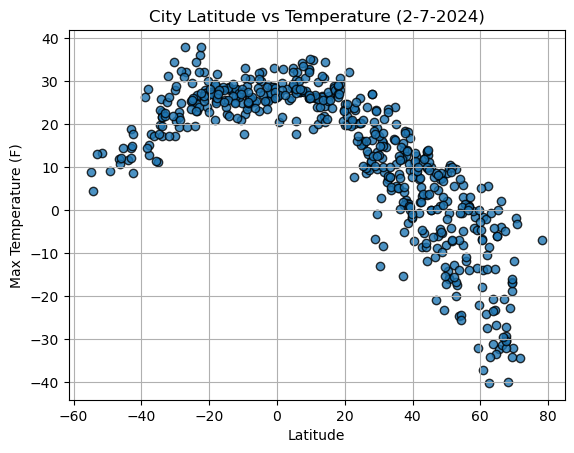

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],
            edgecolor="black", marker="o", linewidth=1,
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Temperature (2-7-2024)")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

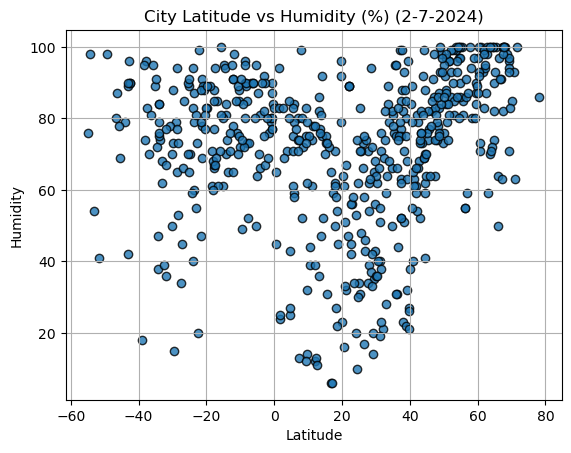

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],
            edgecolor="black", marker="o", linewidth=1,
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity (%) (2-7-2024)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

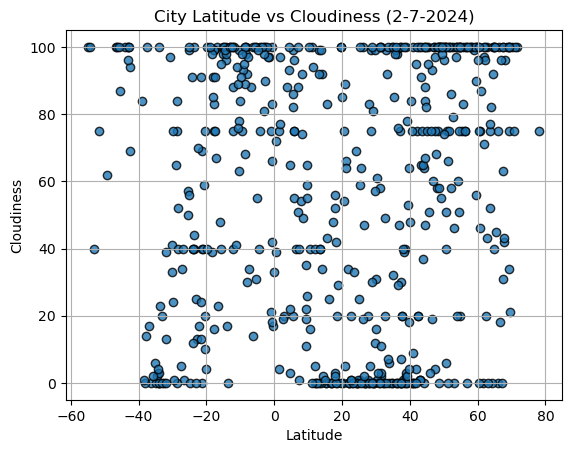

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],
            edgecolor="black", marker="o", linewidth=1,
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness (2-7-2024)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

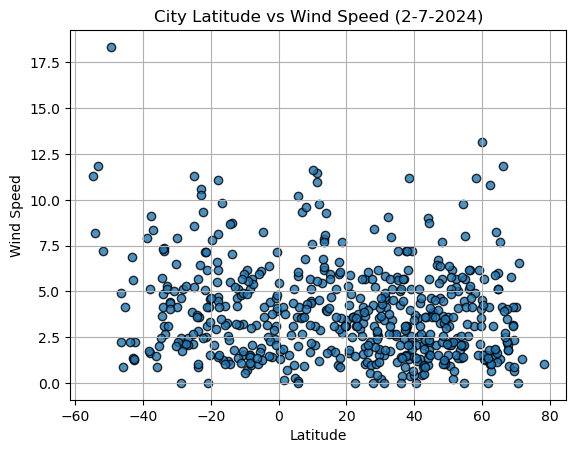

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],
            edgecolor="black", marker="o", linewidth=1,
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed (2-7-2024)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plot
def linear_regression(x,y):
    print(f"The r-value is : {(st.pearsonr(x, y)[0])}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,okha,53.5739,142.9478,-24.72,100,97,1.81,RU,1707675389
2,ponta delgada,37.7333,-25.6667,18.44,88,20,7.20,PT,1707675389
5,tateyama,34.9833,139.8667,5.61,81,32,5.77,JP,1707675389
6,tiksi,71.6872,128.8694,-34.40,100,100,1.28,RU,1707675389
7,klyuchi,52.2667,79.1667,-12.74,86,58,5.67,RU,1707675278


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.01,89,99,11.31,PN,1707675265
3,blackmans bay,-43.0167,147.3167,14.29,89,100,1.36,AU,1707675389
4,ushuaia,-54.8000,-68.3000,8.81,76,100,11.32,AR,1707675126
9,greymouth,-42.4667,171.2000,8.53,90,69,2.26,NZ,1707675389
12,trevelin,-43.0858,-71.4639,18.71,42,100,5.62,AR,1707675390


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.8647453224670841


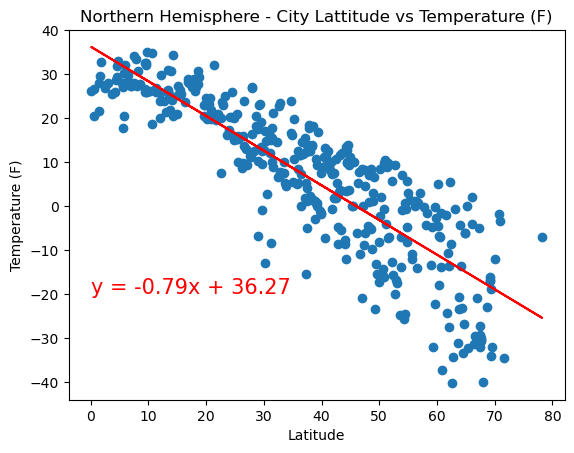

There is a strong correlation between City Lattitude and Temperature in the Northen Hemisphere.
Lattitudes closer to the equator (lat=0) have higher temperatures.
The fit of the line is strong as indicated by the r-value of -0.85, which is close to -1.


In [15]:
# Linear regression on Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
annotate(equation, 0, -20)
plt.title("Northern Hemisphere - City Lattitude vs Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()
print("There is a strong correlation between City Lattitude and Temperature in the Northen Hemisphere.")
print("Lattitudes closer to the equator (lat=0) have higher temperatures.")
print("The fit of the line is strong as indicated by the r-value of -0.85, which is close to -1.")

The r-value is : 0.6469668582792457


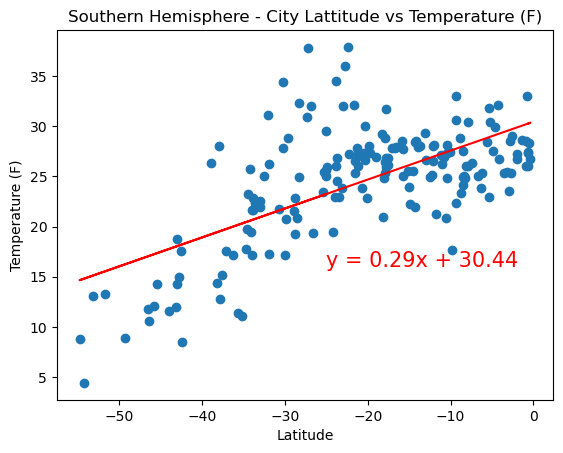

There is a somewhat weak correlation between City Lattitude and Temperature in the Northen Hemisphere.
The correlation may indicate that locations closer to lat=0 have higher temperattures.
The fit of the line is weak as indicated by the r-value of 0.64, which is not close to 1.


In [23]:
# Linear regression on Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
annotate(equation, -25, 16)
plt.title("Southern Hemisphere - City Lattitude vs Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()
print("There is a somewhat weak correlation between City Lattitude and Temperature in the Northen Hemisphere.")
print("The correlation may indicate that locations closer to lat=0 have higher temperattures.")
print("The fit of the line is weak as indicated by the r-value of 0.64, which is not close to 1.")

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.4959215413597673


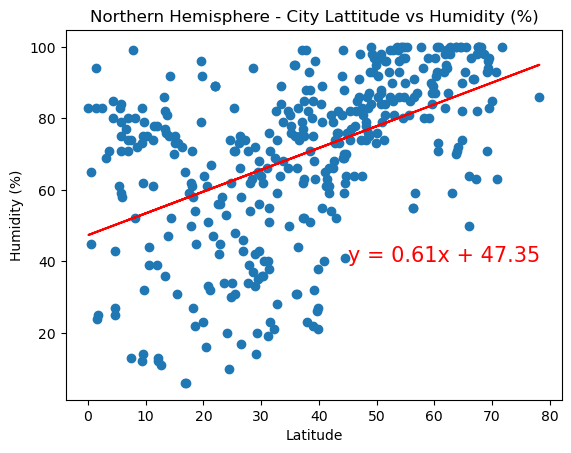

There is a weak correlation between City Lattitude and Humidity in the Northen Hemisphere.
The fit of the line is weak as indicated by the r-value of 0.42, which is not close to 1.


In [17]:
# Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
annotate(equation, 45, 40)
plt.title("Northern Hemisphere - City Lattitude vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
print("There is a weak correlation between City Lattitude and Humidity in the Northen Hemisphere.")
print("The fit of the line is weak as indicated by the r-value of 0.42, which is not close to 1.")

The r-value is : 0.15568464268576454


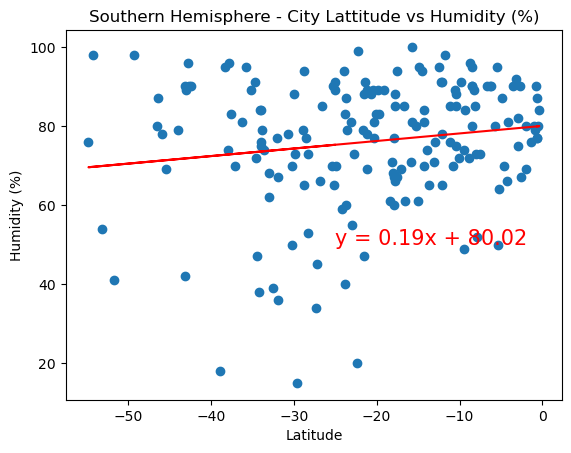

There is almost no correlation between City Lattitude and Humidity in the Southern Hemisphere.
The fit of the line is very weak as indicated by the r-value of 0.25, which is not close to 1.


In [24]:
# Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
annotate(equation, -25, 50)
plt.title("Southern Hemisphere - City Lattitude vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
print("There is almost no correlation between City Lattitude and Humidity in the Southern Hemisphere.")
print("The fit of the line is very weak as indicated by the r-value of 0.25, which is not close to 1.")

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.30400635165517426


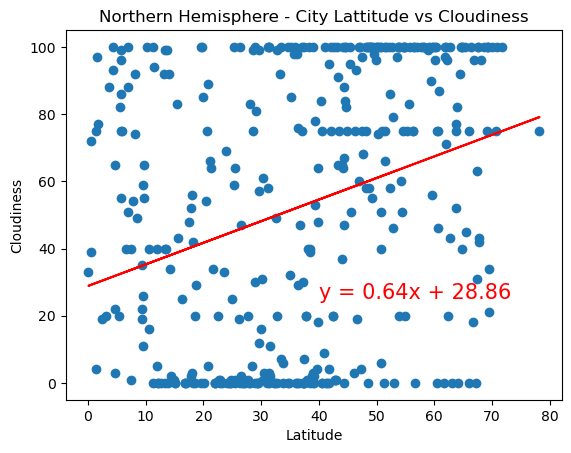

There is a very weak correlation between City Lattitude and Cloudiness in the Northen Hemisphere.
The fit of the line is weak as indicated by the r-value of 0.30, which is not close to 1.


In [28]:
# Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
annotate(equation, 40, 25)
plt.title("Northern Hemisphere - City Lattitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
print("There is a very weak correlation between City Lattitude and Cloudiness in the Northen Hemisphere.")
print("The fit of the line is weak as indicated by the r-value of 0.30, which is not close to 1.")

The r-value is : 0.253742897456094


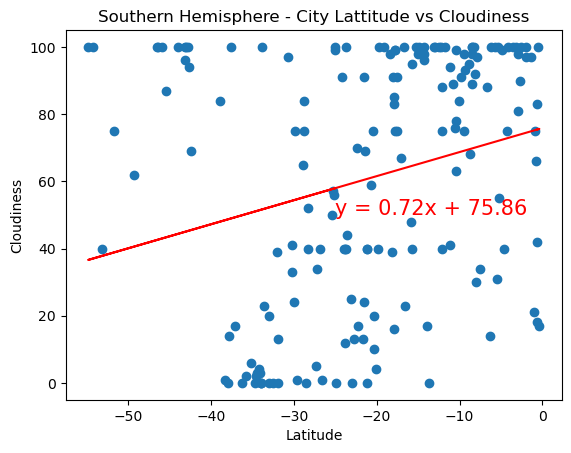

There is a very weak correlation between City Lattitude and Cloudiness in the Southern Hemisphere.
The fit of the line is weak as indicated by the r-value of 0.25, which is not close to 1.


In [29]:
# Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
annotate(equation, -25, 50)
plt.title("Southern Hemisphere - City Lattitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
print("There is a very weak correlation between City Lattitude and Cloudiness in the Southern Hemisphere.")
print("The fit of the line is weak as indicated by the r-value of 0.25, which is not close to 1.")

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : -0.09553934752104759


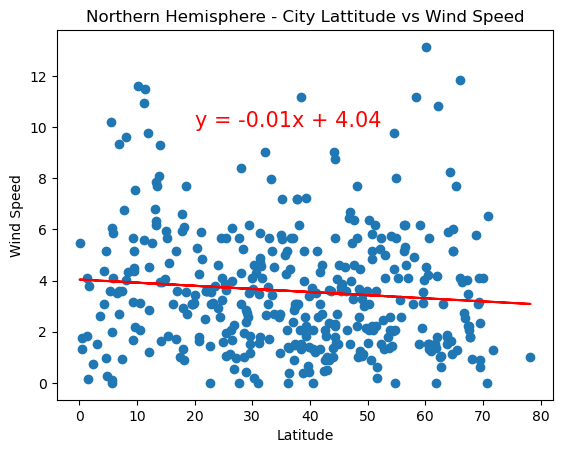

There is no correlation between City Lattitude and Windspeed in the Northern Hemisphere.
The fit of the line is weak as indicated by the r-value of -0.096, which is almost zero.


In [33]:
# Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
annotate(equation, 20, 10)
plt.title("Northern Hemisphere - City Lattitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
print("There is no correlation between City Lattitude and Windspeed in the Northern Hemisphere.")
print("The fit of the line is weak as indicated by the r-value of -0.096, which is almost zero.")

The r-value is : -0.23107675456194138


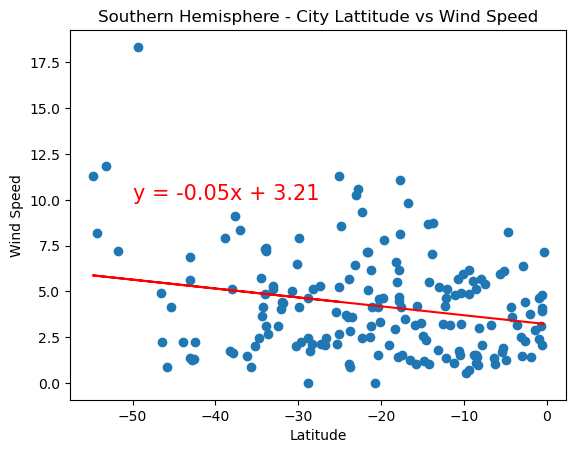

There is a very limited correlation between City Lattitude and Windspeed in the Southern Hemisphere.
The fit of the line is weak as indicated by the r-value of -0.23, which is not close to -1.


In [32]:
# Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
annotate(equation, -50, 10)
plt.title("Southern Hemisphere - City Lattitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
print("There is a very limited correlation between City Lattitude and Windspeed in the Southern Hemisphere.")
print("The fit of the line is weak as indicated by the r-value of -0.23, which is not close to -1.")